In [1]:
# importing all necessary libraries libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# loading in the csv file and creating the dataframe
df = pd.read_csv('churn_clean.csv', index_col=0)

In [3]:
# setting this option allows us to see every column (all 51)
pd.set_option('display.max_columns', None)
# looking at top two records with max columns set
df.head(2)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4


In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe(include='all')

In [5]:
# looking for duplicate records

total_dups = df.duplicated().sum()
print(f'Total number of duplicate records: {total_dups}')

Total number of duplicate records: 0


In [ ]:
df.isna().sum()

In [ ]:
# total nmber of missing string values
empty_strings = (df == '').sum()
empty_strings = empty_strings[empty_strings > 0]
# total number of columns with empty strings
print(f'Total columns: {len(empty_strings)}')
print('Missing string count by column:')
print((df == '').sum())

In [4]:
# correcting the np.nan values with str value 'None'
df['InternetService'] = df['InternetService'].fillna("None")
# we should see 3 unique values here, inlcuding 'None' 
df['InternetService'].unique()

array(['Fiber Optic', 'DSL', 'None'], dtype=object)

In [ ]:
# getting all of the columns with quantitative data for viewing outliers
numerical_cols = df.select_dtypes(include='number').columns
# The numerical columns
print(numerical_cols)

In [ ]:
# grid will have 4 rows and 6 columns
nrows, ncols = 4, 6

# creating the subplots grid
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 8))

# flattening the axes 
axes = axes.flatten()

# plotting the boxplots for each column
for col, ax in zip(numerical_cols, axes):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)

# removing empty subplots in the grid 
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

# prevents overlap
plt.tight_layout()
plt.show()

In [6]:
df['Tenure'].describe().to_frame()

,Tenure
count,10000.000000
mean,34.526188
std,26.443063
min,1.000259
25%,7.917694
50%,35.430507
75%,61.479795
max,71.999280


In [7]:
print('Frequency Counts:\n',df['Gender'].value_counts())
print('\nProportions:')
print(df['Gender'].value_counts(normalize=True) * 100)

Frequency Counts:
 Gender
Female       5025
Male         4744
Nonbinary     231
Name: count, dtype: int64

Proportions:
Gender
Female       50.25
Male         47.44
Nonbinary     2.31
Name: proportion, dtype: float64


In [8]:
df.Gender.describe()

count      10000
unique         3
top       Female
freq        5025
Name: Gender, dtype: object

In [13]:
df['Age'].describe().to_frame()

,Age
count,10000.000000
mean,53.078400
std,20.698882
min,18.000000
25%,35.000000
50%,53.000000
75%,71.000000
max,89.000000


In [14]:
df['Income'].describe().to_frame()

,Income
count,10000.000000
mean,39806.926771
std,28199.916702
min,348.670000
25%,19224.717500
50%,33170.605000
75%,53246.170000
max,258900.700000


In [15]:
df['Yearly_equip_failure'].describe().to_frame()

,Yearly_equip_failure
count,10000.000000
mean,0.398000
std,0.635953
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,6.000000


In [ ]:
print('Frequency Counts:\n', df['StreamingTV'].value_counts())
print('\nProportions:')
print(df['StreamingTV'].value_counts(normalize=True) * 100)

In [10]:
print('Frequency Counts:\n', df['StreamingMovies'].value_counts())
print('\nProportions:')
print(df['StreamingMovies'].value_counts(normalize=True) * 100)

Frequency Counts:
 StreamingMovies
No     5110
Yes    4890
Name: count, dtype: int64

Proportions:
StreamingMovies
No     51.1
Yes    48.9
Name: proportion, dtype: float64


In [11]:
print('Frequency Counts:\n', df['InternetService'].value_counts())
print('\nProportions:')
print(df['InternetService'].value_counts(normalize=True) * 100)

Frequency Counts:
 InternetService
Fiber Optic    4408
DSL            3463
None           2129
Name: count, dtype: int64

Proportions:
InternetService
Fiber Optic    44.08
DSL            34.63
None           21.29
Name: proportion, dtype: float64


In [ ]:
# print('Frequency Counts:\n', df['PaymentMethod'].value_counts())
# print('\nProportions:')
# print(df['PaymentMethod'].value_counts(normalize=True) * 100)

In [12]:
print('Frequency Counts:\n', df['PaymentMethod'].value_counts())
print('\nProportions:')
print(df['PaymentMethod'].value_counts(normalize=True) * 100)

Frequency Counts:
 PaymentMethod
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: count, dtype: int64

Proportions:
PaymentMethod
Electronic Check            33.98
Mailed Check                22.90
Bank Transfer(automatic)    22.29
Credit Card (automatic)     20.83
Name: proportion, dtype: float64


In [16]:
df['Bandwidth_GB_Year'].describe().to_frame()

,Bandwidth_GB_Year
count,10000.000000
mean,3392.341550
std,2185.294852
min,155.506715
25%,1236.470827
50%,3279.536903
75%,5586.141370
max,7158.981530


In [17]:
df['Outage_sec_perweek'].describe().to_frame()

,Outage_sec_perweek
count,10000.000000
mean,10.001848
std,2.976019
min,0.099747
25%,8.018214
50%,10.018560
75%,11.969485
max,21.207230


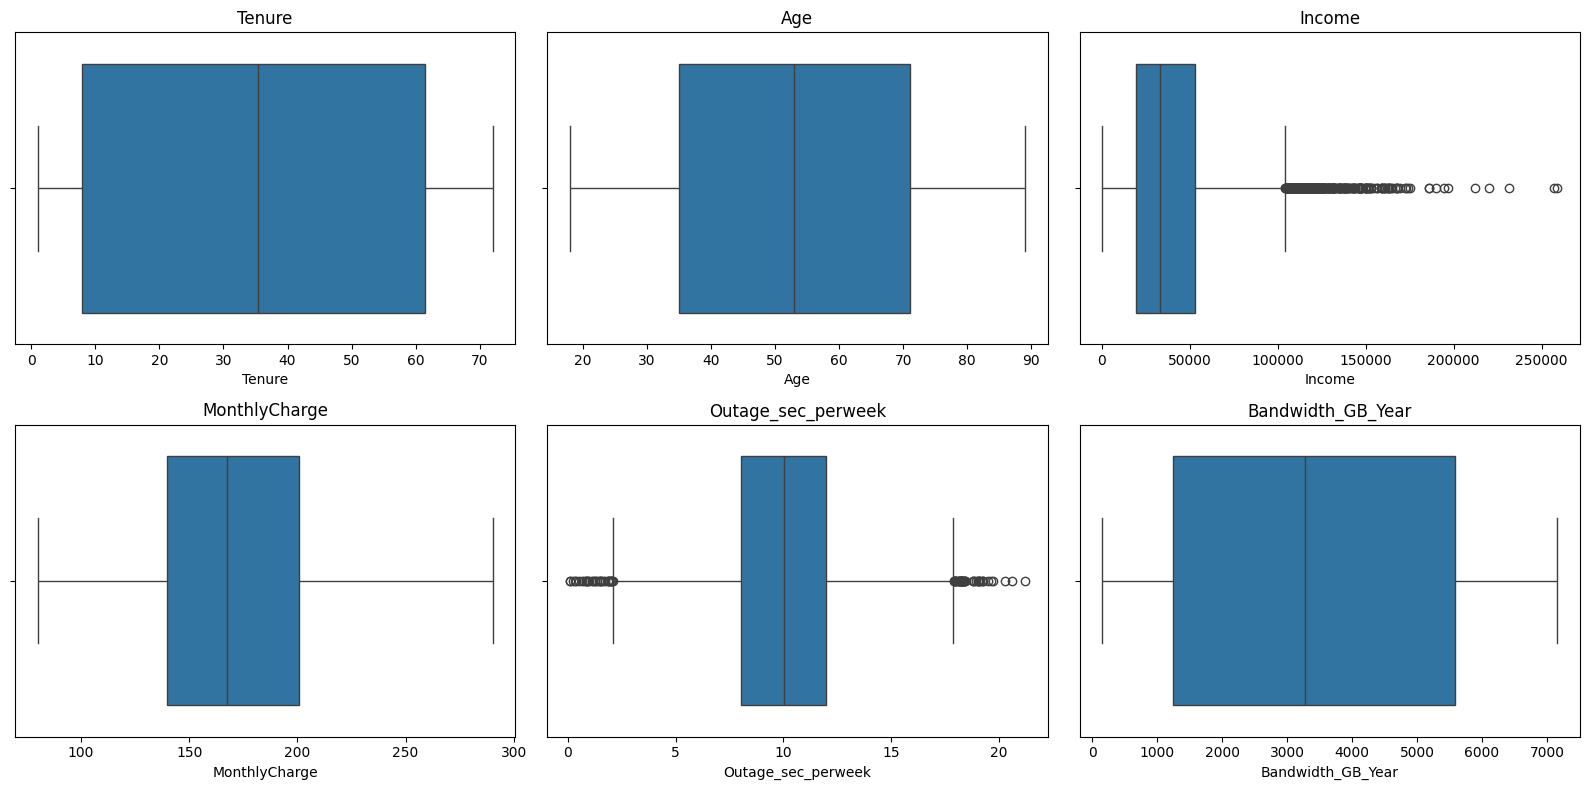

In [18]:
# grid will have 4 rows and 6 columns
numerical_cols = ['Tenure', 'Age', 'Income', 'MonthlyCharge', 'Outage_sec_perweek', 'Bandwidth_GB_Year']

nrows, ncols = 2, 3

# creating the subplots grid
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 8))

# flattening the axes 
axes = axes.flatten()

# plotting the boxplots for each column
for col, ax in zip(numerical_cols, axes):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)

# removing empty subplots in the grid 
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

# prevents overlap
plt.tight_layout()
plt.show()

# Napsterinblue. (2018, July 19). Subplots tips and tricks. Retrieved on July 16, 2024, from 
# https://napsterinblue.github.io/notes/python/viz/subplots/

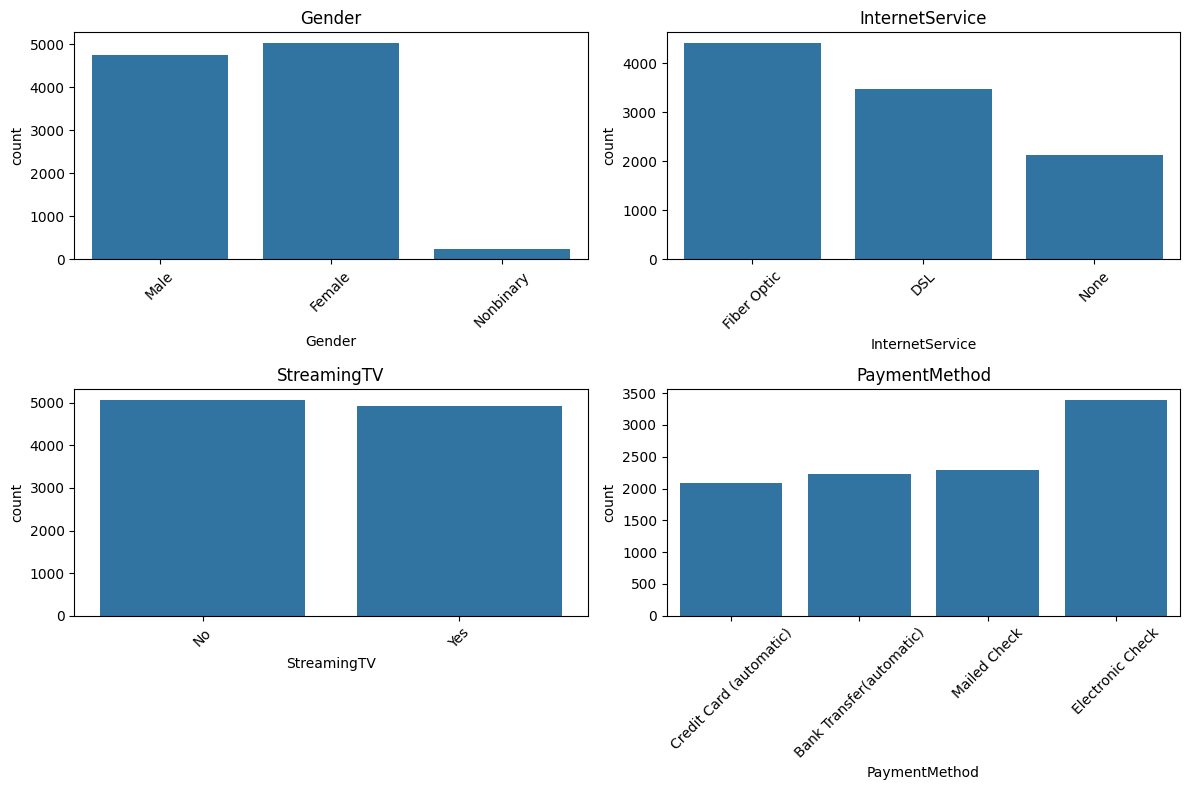

In [19]:
# List of qualitative (categorical) variables
categorical_cols = ['Gender', 'InternetService', 'StreamingTV', 'PaymentMethod']

nrows, ncols = 2,2

# creating the subplots grid
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))

# flattening the axes 
axes = axes.flatten()

# plotting the boxplots for each column
for col, ax in zip(categorical_cols, axes):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)

# # removing empty subplots in the grid 
# for i in range(len(categorical_cols), len(axes)):
#     fig.delaxes(axes[i])

# prevents overlap
plt.tight_layout()
plt.show()

# Napsterinblue. (2018, July 19). Subplots tips and tricks. Retrieved on July 16, 2024, from 
# https://napsterinblue.github.io/notes/python/viz/subplots/

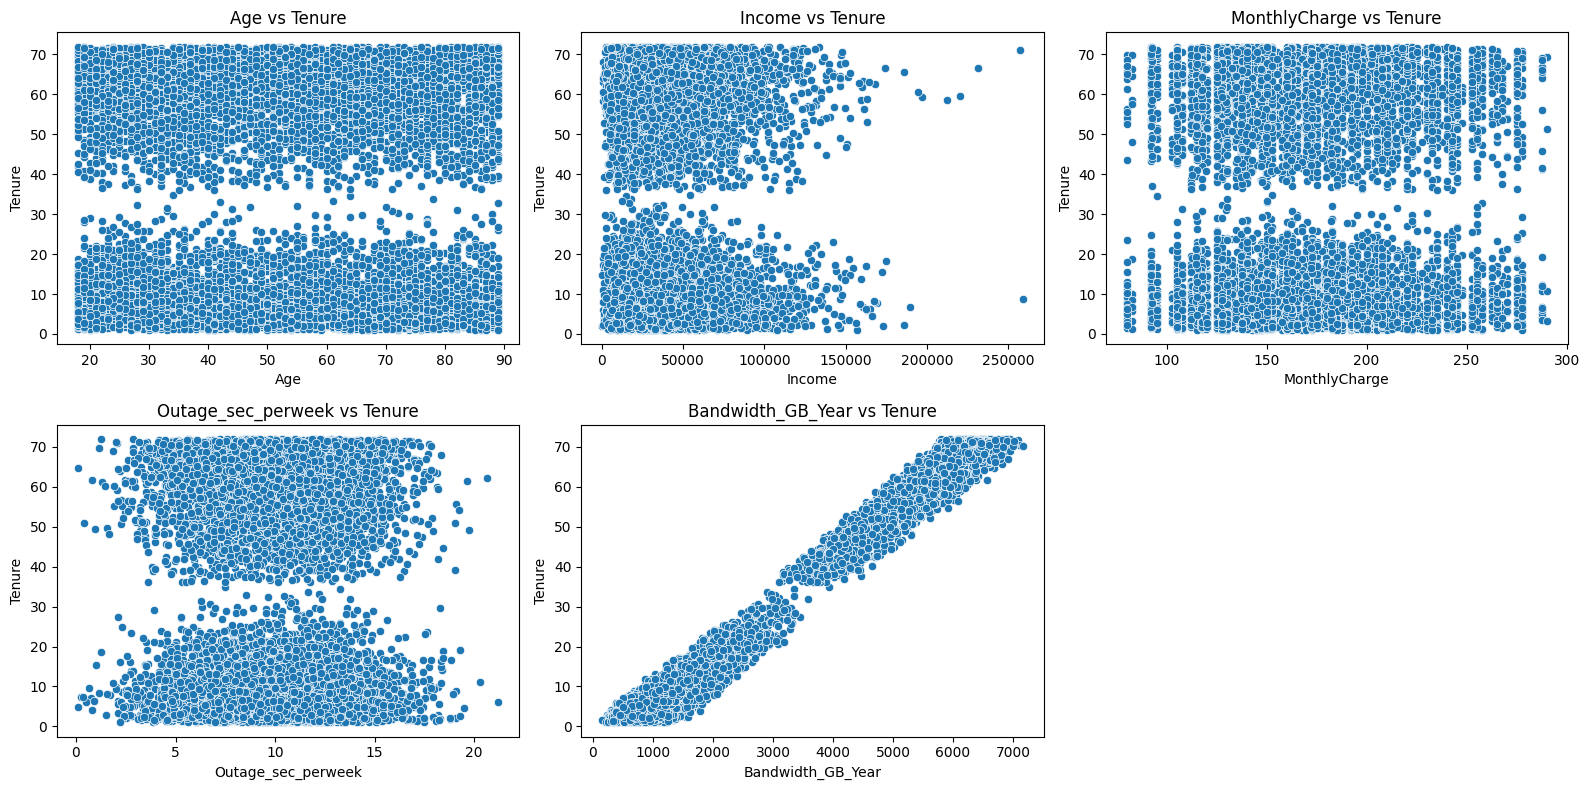

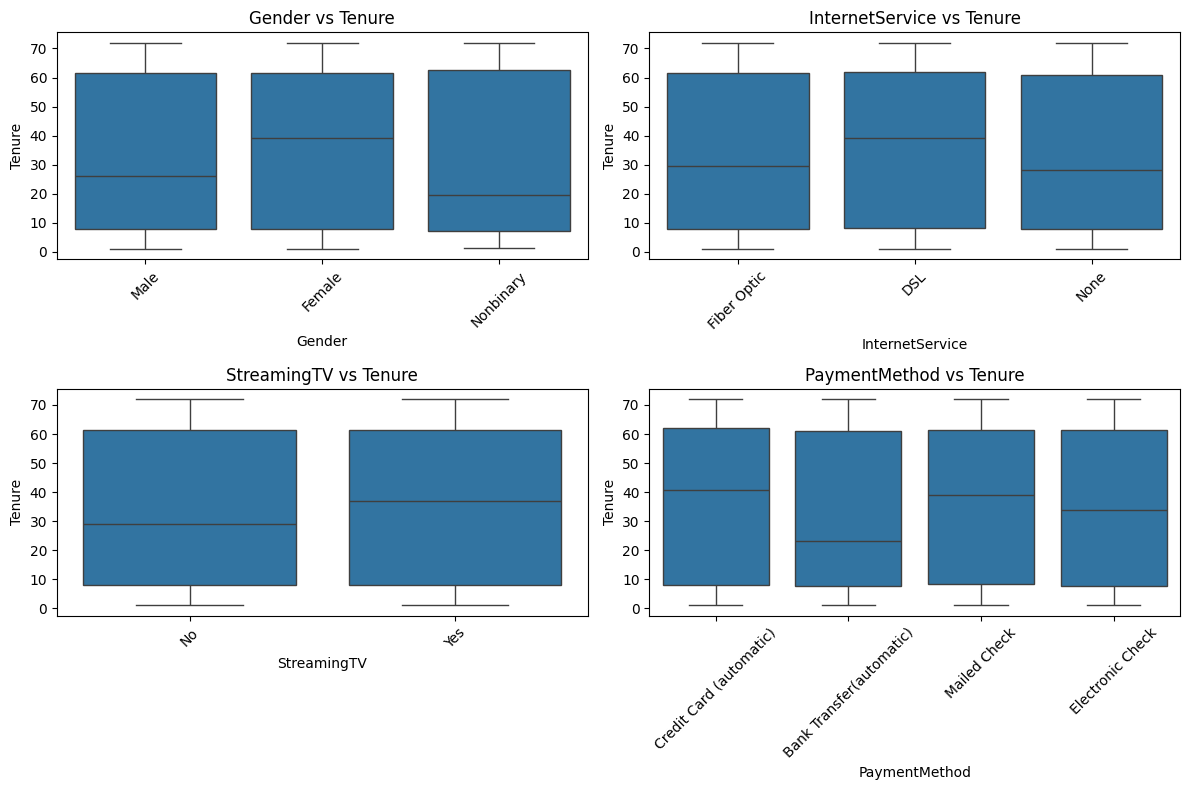

In [20]:
# List of quantitative variables for scatter plots with 'Tenure'
quantitative_vars = ['Age', 'Income', 'MonthlyCharge', 'Outage_sec_perweek', 'Bandwidth_GB_Year']

# List of qualitative variables for boxplots with 'Tenure'
qualitative_vars = ['Gender', 'InternetService', 'StreamingTV', 'PaymentMethod']

# Grid dimensions for scatter plots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

# Plotting scatter plots for quantitative variables vs. 'Tenure'
for col, ax in zip(quantitative_vars, axes):
    sns.scatterplot(x=df[col], y=df['Tenure'], ax=ax)
    ax.set_title(f'{col} vs Tenure')

# Removing empty subplots if necessary
for i in range(len(quantitative_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Grid dimensions for boxplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Plotting boxplots for qualitative variables vs. 'Tenure'
for col, ax in zip(qualitative_vars, axes):
    sns.boxplot(x=df[col], y=df['Tenure'], ax=ax)
    ax.set_title(f'{col} vs Tenure')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

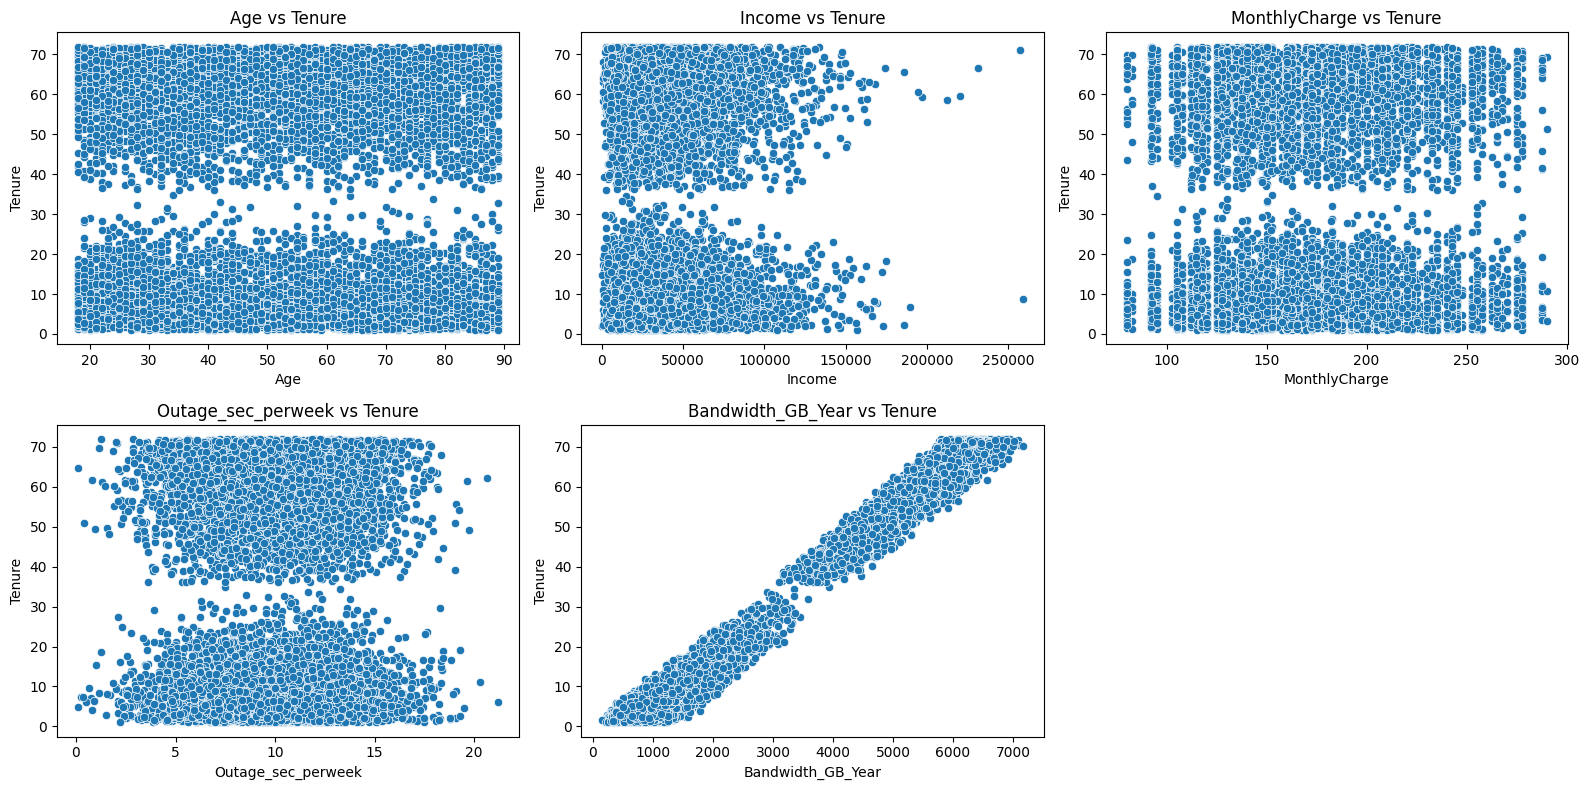

In [21]:
# List of quantitative variables for scatter plots with 'Tenure'
quantitative_vars = [
    'Age', 'Income', 'MonthlyCharge', 'Outage_sec_perweek', 'Bandwidth_GB_Year'
]

# Grid dimensions for scatter plots (2 rows, 3 columns)
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

# Plotting scatter plots for quantitative variables vs. 'Tenure'
for col, ax in zip(quantitative_vars, axes):
    sns.scatterplot(x=df[col], y=df['Tenure'], ax=ax)
    ax.set_title(f'{col} vs Tenure')

# Removing empty subplots if necessary
for i in range(len(quantitative_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


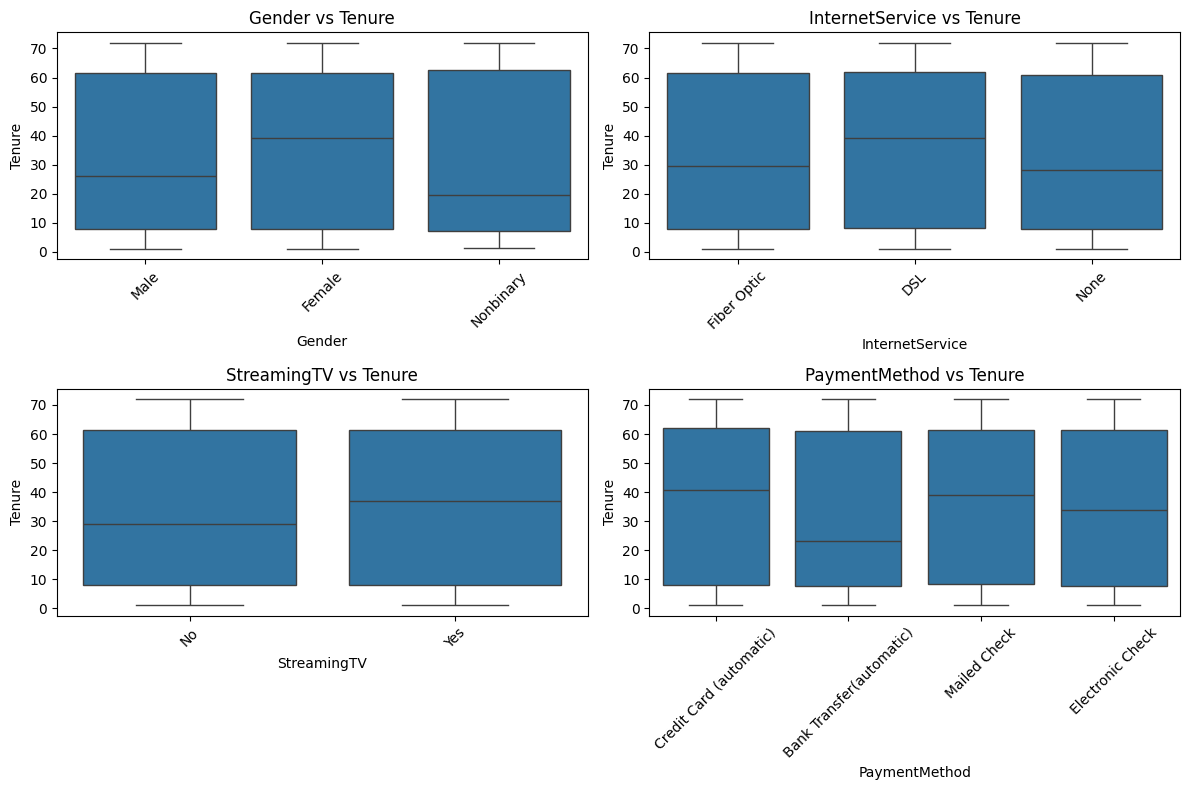

In [22]:
# List of qualitative variables for boxplots with 'Tenure'
qualitative_vars = [
    'Gender', 'InternetService', 'StreamingTV', 'PaymentMethod'
]

# Grid dimensions for boxplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Plotting boxplots for qualitative variables vs. 'Tenure'
for col, ax in zip(qualitative_vars, axes):
    sns.boxplot(x=df[col], y=df['Tenure'], ax=ax)
    ax.set_title(f'{col} vs Tenure')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

In [24]:
df_trans = pd.get_dummies(df[qualitative_vars], drop_first=True).astype(int)
df_trans

,Gender_Male,Gender_Nonbinary,InternetService_Fiber Optic,InternetService_None,StreamingTV_Yes,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
CaseOrder,,,,,,,,
1,1,0,1,0,0,1,0,0
2,0,0,1,0,1,0,0,0
3,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,1
5,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
9996,1,0,0,0,0,0,1,0
9997,1,0,1,0,1,0,1,0
9998,0,0,1,0,0,0,0,0


In [27]:
# combining the transformed dataframe to include the numerical columns
df_trans = pd.concat([df_trans, df[quantitative_vars]], axis=1)

In [28]:
# also adding the dependent variable Tenure
df_trans['Tenure'] = df['Tenure']

In [29]:
df_trans.columns

Index(['Gender_Male', 'Gender_Nonbinary', 'InternetService_Fiber Optic',
       'InternetService_None', 'StreamingTV_Yes',
       'PaymentMethod_Credit Card (automatic)',
       'PaymentMethod_Electronic Check', 'PaymentMethod_Mailed Check', 'Age',
       'Income', 'MonthlyCharge', 'Outage_sec_perweek', 'Bandwidth_GB_Year',
       'Tenure'],
      dtype='object')

In [30]:
# adjusting the column names for the PaymentMethod categories 
df_trans.rename(columns={
    'PaymentMethod_Credit Card (automatic)': 'PaymentMethod_Credit_Card',
    'PaymentMethod_Electronic Check': 'PaymentMethod_Electronic_Check',
    'PaymentMethod_Mailed Check': 'PaymentMethod_Mailed_Check'}, inplace=True)

In [31]:
df_trans.columns

Index(['Gender_Male', 'Gender_Nonbinary', 'InternetService_Fiber Optic',
       'InternetService_None', 'StreamingTV_Yes', 'PaymentMethod_Credit_Card',
       'PaymentMethod_Electronic_Check', 'PaymentMethod_Mailed_Check', 'Age',
       'Income', 'MonthlyCharge', 'Outage_sec_perweek', 'Bandwidth_GB_Year',
       'Tenure'],
      dtype='object')

In [42]:
# defining the dependent variable as `y` and independent variables as `X`
X = df_trans.drop(columns=['Tenure'])
y = df_trans['Tenure']

# adding a y-intercept with statmodels
X = sm.add_constant(X)

# fitting the initial model
init_model = sm.OLS(y, X).fit()

# printing the results
init_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 5.105e+05
Date:                Sun, 25 Aug 2024   Prob (F-statistic):               0.00
Time:                        07:46:57   Log-Likelihood:                -14435.
No. Observations:               10000   AIC:                         2.890e+04
Df Residuals:                    9986   BIC:                         2.900e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.0813      0.070    -58.086      0.000      -4.219      -3.944
Gender_Male                       -0.8320      0.021    -40.038      0.000      -0.873      -0.791
Gender_Nonbinary                   0.2670      0.069      3.867      0.000       0.132       0.402
InternetService_Fiber Optic        5.8923      0.024    244.247      0.000       5.845       5.940
InternetService_None               4.4542      0.029    155.563      0.000       4.398       4.510
StreamingTV_Yes                   -0.9114      0.024    -38.227      0.000      -0.958      -0.865
PaymentMethod_Credit_Card         -0.0380      0.031     -1.216      0.224      -0.099       0.023
PaymentMethod_Electronic_Check    -0.0305      0.028     -1.091      0.275      -0.085       0.024
PaymentMethod_Mailed_Check        -0.0139      0.031     -0.454      0.650      -0.074       0.046
Age                                0.0412      0.000     83.160      0.000       0.040       0.042
Income                          -1.36e-07   3.64e-07     -0.374      0.709   -8.49e-07    5.77e-07
MonthlyCharge                     -0.0440      0.000   -150.339      0.000      -0.045      -0.043
Outage_sec_perweek                -0.0023      0.003     -0.667      0.505      -0.009       0.004
Bandwidth_GB_Year                  0.0122   4.73e-06   2574.698      0.000       0.012       0.012
==============================================================================
Omnibus:                      946.306   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.027
Skew:                          -0.773   Prob(JB):                    2.26e-282
Kurtosis:                       3.849   Cond. No.                     3.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
# creating the empty dataframe for VIF
vif_data = pd.DataFrame()

# creating a `feature` column with the independent variable names
vif_data['feature'] = X.columns

# getting the VIF values for each column into VIF column
vif_data['VIF_score'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [37]:
vif_data

,feature,VIF_score
0,const,46.931848
1,Gender_Male,1.023472
2,Gender_Nonbinary,1.022639
3,InternetService_Fiber Optic,1.363744
4,InternetService_None,1.306014
5,StreamingTV_Yes,1.350599
6,PaymentMethod_Credit_Card,1.533226
7,PaymentMethod_Electronic_Check,1.667914
8,PaymentMethod_Mailed_Check,1.565410
9,Age,1.001564


In [43]:
# seeing the p-values for each independent variable
init_model.pvalues

const                              0.000000e+00
Gender_Male                        0.000000e+00
Gender_Nonbinary                   1.110770e-04
InternetService_Fiber Optic        0.000000e+00
InternetService_None               0.000000e+00
StreamingTV_Yes                   1.605938e-298
PaymentMethod_Credit_Card          2.240154e-01
PaymentMethod_Electronic_Check     2.750859e-01
PaymentMethod_Mailed_Check         6.495967e-01
Age                                0.000000e+00
Income                             7.087080e-01
MonthlyCharge                      0.000000e+00
Outage_sec_perweek                 5.047638e-01
Bandwidth_GB_Year                  0.000000e+00
dtype: float64

In [48]:
# getting the max p-value and corresponding 
print(max(init_model.pvalues))
print(init_model.pvalues.idxmax())
print(X.columns)

0.708708002711306
Income
Index(['const', 'Gender_Male', 'Gender_Nonbinary',
       'InternetService_Fiber Optic', 'InternetService_None',
       'StreamingTV_Yes', 'PaymentMethod_Credit_Card',
       'PaymentMethod_Electronic_Check', 'PaymentMethod_Mailed_Check', 'Age',
       'Income', 'MonthlyCharge', 'Outage_sec_perweek', 'Bandwidth_GB_Year'],
      dtype='object')


In [53]:
# creating a function to get reduced model:
threshold = 0.05
X_reduced = X.copy()
while True:
    # the model will shed the variable with the highest p-value over 0.05 threshold
    # creating the model with statsmodel OLS method
    reduced_backwards_model = sm.OLS(y, X_reduced).fit()
    # getting the p-values for each indep. variable
    p_values = reduced_backwards_model.pvalues
    # finding the maximum p-value
    max_pvalue = max(p_values)
    # checking if max p-value is > threshold of 0.05
    if max_pvalue > threshold:
        max_var = p_values.idxmax()
        print(f"Removing variable: {max_var} with p-value: {max_pvalue}")
        X_reduced = X_reduced.drop(columns=[max_var])
        
    else:
        break
# printing the reduced model summary:
reduced_backwards_model.summary()

Removing variable: Income with p-value: 0.708708002711306
Removing variable: PaymentMethod_Mailed_Check with p-value: 0.6450171140043601
Removing variable: Outage_sec_perweek with p-value: 0.5074429562640855
Removing variable: PaymentMethod_Electronic_Check with p-value: 0.30969490960941143
Removing variable: PaymentMethod_Credit_Card with p-value: 0.4048036842231796


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 8.298e+05
Date:                Sun, 25 Aug 2024   Prob (F-statistic):               0.00
Time:                        08:21:38   Log-Likelihood:                -14437.
No. Observations:               10000   AIC:                         2.889e+04
Df Residuals:                    9991   BIC:                         2.896e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -4.1302      0.057    -72.752      0.000      -4.241      -4.019
Gender_Male                    -0.8323      0.021    -40.084      0.000      -0.873      -0.792
Gender_Nonbinary                0.2673      0.069      3.873      0.000       0.132       0.403
InternetService_Fiber Optic     5.8919      0.024    244.369      0.000       5.845       5.939
InternetService_None            4.4535      0.029    155.597      0.000       4.397       4.510
StreamingTV_Yes                -0.9112      0.024    -38.224      0.000      -0.958      -0.864
Age                             0.0412      0.000     83.220      0.000       0.040       0.042
MonthlyCharge                  -0.0440      0.000   -150.404      0.000      -0.045      -0.043
Bandwidth_GB_Year               0.0122   4.73e-06   2575.436      0.000       0.012       0.012
==============================================================================
Omnibus:                      946.928   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1298.483
Skew:                          -0.773   Prob(JB):                    1.09e-282
Kurtosis:                       3.851   Cond. No.                     2.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
# creating a new VIF dataframe with reduced X
vif_data_reduced = pd.DataFrame()

# creating a `feature` column with the independent variable names
vif_data_reduced['feature'] = X_reduced.columns

# getting the VIF values for each column into VIF column
vif_data_reduced['VIF_score'] = [variance_inflation_factor(X_reduced.values, i) for i in range(len(X_reduced.columns))]

In [55]:
vif_data_reduced

,feature,VIF_score
0,const,30.645399
1,Gender_Male,1.022216
2,Gender_Nonbinary,1.022450
3,InternetService_Fiber Optic,1.362550
4,InternetService_None,1.305352
5,StreamingTV_Yes,1.350521
6,Age,1.000815
7,MonthlyCharge,1.497779
8,Bandwidth_GB_Year,1.016968


In [65]:
# Multiple Linear Regression (MLR) r-squared values
print('R-squared values for Initial and Reduced MLR Models')
print(f"Initial MLR Model:     {init_model.rsquared_adj}")
print(f"Reduced MLR Model: {reduced_backwards_model.rsquared_adj}")
print(f"Reduced Model is larger by: {reduced_backwards_model.rsquared_adj - init_model.rsquared_adj}")

R-squared values for Initial and Reduced MLR Models
Initial MLR Model:     0.9984956147848548
Reduced MLR Model: 0.9984959886782232
Reduced Model is larger by: 3.7389336837723164e-07


In [38]:
# removing the variables with p-values over 0.05
X_reduced = X.drop(columns=['PaymentMethod_Credit_Card',
       'PaymentMethod_Electronic_Check', 'PaymentMethod_Mailed_Check', 
                            'Income', 'Outage_sec_perweek'])

In [39]:
# creating a new VIF dataframe with reduced X
vif_data_reduced = pd.DataFrame()

# creating a `feature` column with the independent variable names
vif_data_reduced['feature'] = X_reduced.columns

# getting the VIF values for each column into VIF column
vif_data_reduced['VIF_score'] = [variance_inflation_factor(X_reduced.values, i) for i in range(len(X_reduced.columns))]

In [40]:
vif_data_reduced

,feature,VIF_score
0,const,30.645399
1,Gender_Male,1.022216
2,Gender_Nonbinary,1.022450
3,InternetService_Fiber Optic,1.362550
4,InternetService_None,1.305352
5,StreamingTV_Yes,1.350521
6,Age,1.000815
7,MonthlyCharge,1.497779
8,Bandwidth_GB_Year,1.016968


In [41]:

# adding a y-intercept with statmodels
X_reduced = sm.add_constant(X_reduced)

# fitting the initial model
reduced_model = sm.OLS(y, X_reduced).fit()

# printing the results
reduced_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 8.298e+05
Date:                Sat, 24 Aug 2024   Prob (F-statistic):               0.00
Time:                        17:57:36   Log-Likelihood:                -14437.
No. Observations:               10000   AIC:                         2.889e+04
Df Residuals:                    9991   BIC:                         2.896e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -4.1302      0.057    -72.752      0.000      -4.241      -4.019
Gender_Male                    -0.8323      0.021    -40.084      0.000      -0.873      -0.792
Gender_Nonbinary                0.2673      0.069      3.873      0.000       0.132       0.403
InternetService_Fiber Optic     5.8919      0.024    244.369      0.000       5.845       5.939
InternetService_None            4.4535      0.029    155.597      0.000       4.397       4.510
StreamingTV_Yes                -0.9112      0.024    -38.224      0.000      -0.958      -0.864
Age                             0.0412      0.000     83.220      0.000       0.040       0.042
MonthlyCharge                  -0.0440      0.000   -150.404      0.000      -0.045      -0.043
Bandwidth_GB_Year               0.0122   4.73e-06   2575.436      0.000       0.012       0.012
==============================================================================
Omnibus:                      946.928   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1298.483
Skew:                          -0.773   Prob(JB):                    1.09e-282
Kurtosis:                       3.851   Cond. No.                     2.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""